<a href="https://colab.research.google.com/github/sadiashoaib415/Quantum_Computer/blob/main/Qiskit_for_Quantum_Trading_(Binance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the modern Qiskit ecosystem (Modularized for 2026)
!pip install qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.3 MB/s eta 0:00:00


In [5]:
import numpy as np
from qiskit.circuit.library import z_feature_map, real_amplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# 1. Sample Price Data
prices = np.array([100, 102, 101, 105, 107, 110, 108, 111, 115])

# 2. Data Preparation
X = prices[:-1].reshape(-1, 1)
y = prices[1:]
max_price = np.max(prices)
X_norm = X / max_price
y_norm = y / max_price

# 3. Model Architecture
# Position 1 is the number of qubits (1 for our single price input)
feature_map = z_feature_map(1, reps=2)
ansatz = real_amplitudes(1, reps=2)

# 4. Setup the VQR Engine
estimator = StatevectorEstimator()
optimizer = L_BFGS_B(maxiter=20)

model = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=estimator
)

print("Quantum Model Successfully Initialized!")

Quantum Model Successfully Initialized!


In [6]:
# 1. Train the Quantum Model
# This step may take 30-60 seconds as the classical optimizer
# talks to the quantum simulator to find the best 'weights'.
print("Training Quantum Regressor on Price Trends...")
model.fit(X_norm, y_norm)

# 2. Prepare the Input for Prediction
# We take the very last price in our data to predict the NEXT one.
last_price_actual = prices[-1]
last_price_norm = np.array([[last_price_actual / max_price]])

# 3. Generate the Prediction
prediction_norm = model.predict(last_price_norm)

# 4. Denormalize (Convert the 0-1 quantum result back to Dollars)
predicted_price = prediction_norm[0][0] * max_price

print(f"\n" + "="*30)
print(f"   QUANTUM TRADING REPORT")
print(f"="*30)
print(f"Current Market Price: ${last_price_actual:.2f}")
print(f"Quantum Predicted Price: ${predicted_price:.2f}")

# 5. Simple Trading Signal Logic
if predicted_price > last_price_actual:
    diff = predicted_price - last_price_actual
    print(f"SIGNAL: 📈 BUY (Predicting +${diff:.2f} move)")
else:
    diff = last_price_actual - predicted_price
    print(f"SIGNAL: 📉 SELL/HOLD (Predicting -${diff:.2f} move)")
print("="*30)

Training Quantum Regressor on Price Trends...

   QUANTUM TRADING REPORT
Current Market Price: $115.00
Quantum Predicted Price: $106.20
SIGNAL: 📉 SELL/HOLD (Predicting -$8.80 move)


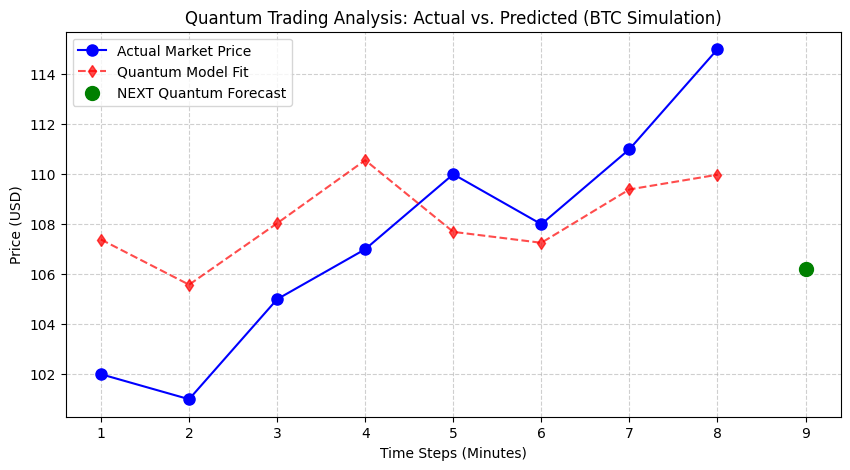

In [7]:
import matplotlib.pyplot as plt

# 1. Generate predictions for the entire training set
# This shows how well the model 'learned' the past
train_predictions_norm = model.predict(X_norm)
train_predictions = train_predictions_norm * max_price

# 2. Create the Timeline (Indices 1 to 9)
time_steps = np.arange(1, len(prices))

# 3. Plotting the Comparison
plt.figure(figsize=(10, 5))

# Plot Actual Prices
plt.plot(time_steps, y, 'bo-', label='Actual Market Price', markersize=8)

# Plot Quantum Predicted Prices
plt.plot(time_steps, train_predictions, 'rd--', label='Quantum Model Fit', alpha=0.7)

# Highlight the "Next Price" Prediction
plt.scatter(len(prices), predicted_price, color='green', s=100, label='NEXT Quantum Forecast', zorder=5)

# Formatting the Chart
plt.title("Quantum Trading Analysis: Actual vs. Predicted (BTC Simulation)")
plt.xlabel("Time Steps (Minutes)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()